In [14]:
from pytrends.request import TrendReq
from pytrends import dailydata
import matplotlib.pyplot as plt

import pandas as pd
plt.style.use('fivethirtyeight')


In [3]:
#monthly trend data
pt = TrendReq()

kw_list = ["bitcoin"]

pt.build_payload(kw_list, timeframe='2010-01-01 2021-05-19')

df = pt.interest_over_time()

df.tail()

,bitcoin,isPartial
date,,
2021-01-01,62,False
2021-02-01,63,False
2021-03-01,48,False
2021-04-01,49,False
2021-05-01,61,False


In [1]:
#daily trend data

from pytrends.request import TrendReq
from pytrends import dailydata

df = dailydata.get_daily_data('bitcoin', 2021, 1, 2021, 12)

print(df)

bitcoin:2021-01-01 2021-01-31
bitcoin:2021-02-01 2021-02-28
bitcoin:2021-03-01 2021-03-31
bitcoin:2021-04-01 2021-04-30
bitcoin:2021-05-01 2021-05-31
bitcoin:2021-06-01 2021-06-30
bitcoin:2021-07-01 2021-07-31
bitcoin:2021-08-01 2021-08-31
bitcoin:2021-09-01 2021-09-30
bitcoin:2021-10-01 2021-10-31
bitcoin:2021-11-01 2021-11-30
bitcoin:2021-12-01 2021-12-31
            bitcoin_unscaled  bitcoin_monthly isPartial  scale  bitcoin
date                                                                   
2021-01-01                32              NaN       NaN    NaN      NaN
2021-01-02                65              NaN       NaN    NaN      NaN
2021-01-03                72             97.0     False   0.97    69.84
2021-01-04                59             97.0       NaN   0.97    57.23
2021-01-05                48             97.0       NaN   0.97    46.56
...                      ...              ...       ...    ...      ...
2021-12-27                41             30.0       NaN   0.30  

In [25]:
bitcoin_gsv = df[['bitcoin']]
bitcoin_gsv.reset_index(inplace=True)
bitcoin_gsv


,date,bitcoin
0,2021-01-01,NaN
1,2021-01-02,NaN
2,2021-01-03,69.84
3,2021-01-04,57.23
4,2021-01-05,46.56
...,...,...
360,2021-12-27,12.30
361,2021-12-28,13.80
362,2021-12-29,13.80
363,2021-12-30,12.30


In [88]:
import yfinance as yf
btc = yf.download('BTC-USD', start='2021-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [89]:
btc.reset_index(inplace=True)
btc.rename(columns={'Date':'date'}, inplace=True)

In [90]:
new_df = pd.merge(bitcoin_gsv, btc, how='inner', on='date')

In [91]:
new_df = new_df.dropna()
new_df['Returns'] = new_df['Close'] / new_df['Close'].shift(1) - 1
#new_df['Volatility'] = new_df['Returns'].rolling(window=252).std()
new_df = new_df.dropna()
new_df

,date,bitcoin,Open,High,Low,Close,Adj Close,Volume,Returns
3,2021-01-04,57.23,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,-0.024712
4,2021-01-05,46.56,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,0.063197
5,2021-01-06,54.32,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,0.083311
6,2021-01-07,83.42,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,0.069157
7,2021-01-08,80.51,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480,0.036234
...,...,...,...,...,...,...,...,...,...
359,2021-12-26,11.10,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926,0.007528
360,2021-12-27,12.30,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,-0.003328
361,2021-12-28,13.80,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-0.060259
362,2021-12-29,13.80,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,-0.024042


In [92]:
cols_to_norm = ['bitcoin','Close','Volume', 'Returns']
new_df[cols_to_norm] = new_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

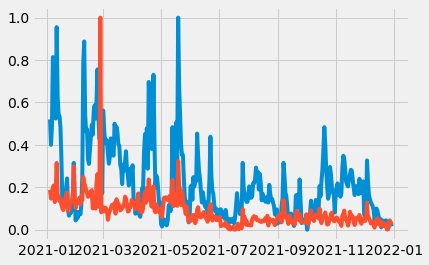

In [93]:
plt.plot(new_df['date'], new_df['bitcoin'], label='Google Search Volume')
plt.plot(new_df['date'], new_df['Volume'], label='Bitcoin Volume')


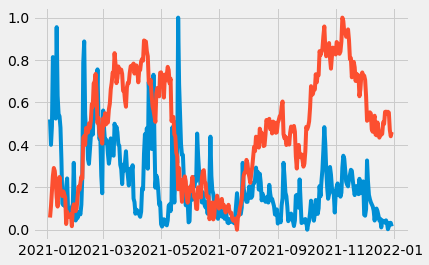

In [94]:
plt.plot(new_df['date'], new_df['bitcoin'], label='Google Search Volume')
plt.plot(new_df['date'], new_df['Close'], label='Bitcoin Price')

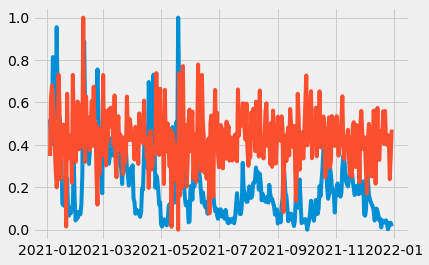

In [95]:
plt.plot(new_df['date'], new_df['bitcoin'], label='Google Search Volume')
plt.plot(new_df['date'], new_df['Returns'], label='Bitcoin Returns')

In [96]:
btc_df=new_df.copy()

In [97]:
btc_df

,date,bitcoin,Open,High,Low,Close,Adj Close,Volume,Returns
3,2021-01-04,0.519870,32810.949219,33440.218750,28722.755859,0.057325,31971.914062,0.187776,0.347401
4,2021-01-05,0.400090,31977.041016,34437.589844,30221.187500,0.110835,33992.429688,0.146786,0.617785
5,2021-01-06,0.487203,34013.613281,36879.699219,33514.035156,0.185835,36824.363281,0.170093,0.679650
6,2021-01-07,0.813875,36833.875000,40180.367188,36491.191406,0.253279,39371.042969,0.198610,0.636119
7,2021-01-08,0.781208,39381.765625,41946.738281,36838.636719,0.291060,40797.609375,0.208681,0.534855
...,...,...,...,...,...,...,...,...,...
359,2021-12-26,0.002021,50428.691406,51196.378906,49623.105469,0.556209,50809.515625,0.006552,0.446564
360,2021-12-27,0.015492,50802.609375,51956.328125,50499.468750,0.551731,50640.417969,0.016667,0.413173
361,2021-12-28,0.032330,50679.859375,50679.859375,47414.210938,0.470915,47588.855469,0.044080,0.238067
362,2021-12-29,0.032330,47623.871094,48119.742188,46201.496094,0.440614,46444.710938,0.033901,0.349461


In [98]:
new_df['Volatility'] = new_df['Returns'].rolling(window=20).std()


In [101]:
new_df.dropna()

,date,bitcoin,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility
22,2021-01-23,0.089358,32985.757812,33360.976562,31493.160156,0.059860,32067.642578,0.089008,0.335988,0.184657
23,2021-01-24,0.066008,32064.376953,32944.007812,31106.685547,0.065733,32289.378906,0.089879,0.444676,0.183775
24,2021-01-25,0.079479,32285.798828,34802.742188,32087.787109,0.067772,32366.392578,0.123755,0.430745,0.178407
25,2021-01-26,0.079479,32358.613281,32794.550781,31030.265625,0.073160,32569.849609,0.124834,0.442743,0.167873
26,2021-01-27,0.106421,32564.029297,32564.029297,29367.138672,0.016557,30432.546875,0.131822,0.221573,0.163901
...,...,...,...,...,...,...,...,...,...,...
359,2021-12-26,0.002021,50428.691406,51196.378906,49623.105469,0.556209,50809.515625,0.006552,0.446564,0.095252
360,2021-12-27,0.015492,50802.609375,51956.328125,50499.468750,0.551731,50640.417969,0.016667,0.413173,0.095282
361,2021-12-28,0.032330,50679.859375,50679.859375,47414.210938,0.470915,47588.855469,0.044080,0.238067,0.104032
362,2021-12-29,0.032330,47623.871094,48119.742188,46201.496094,0.440614,46444.710938,0.033901,0.349461,0.097958


In [126]:
ticker = pd.read_csv('data/meta_data.csv', sep=";", encoding='cp1252')
ticker

,"Symbol,Name"
0,"Bitcoin USDBTC-USD,Bitcoin USD"
1,"Ethereum USDETH-USD,Ethereum USD"
2,"Tether USDUSDT-USD,Tether USD"
3,"USD Coin USDUSDC-USD,USD Coin USD"
4,"Binance Coin USDBNB-USD,Binance Coin USD"
...,...
693,"Gari Network USDGARI-USD,Gari Network USD"
694,"GST5-USD,Green Satoshi Token (ETH) USD"
695,"Star Atlas USDATLAS-USD,Star Atlas USD"
696,"Oxen USDOXEN-USD,Oxen USD"


In [128]:
ticker['Ticker'] = ticker['Symbol,Name'].str.split(',').str[0]
ticker['Name'] = ticker['Symbol,Name'].str.split(',').str[1]
ticker.drop('Symbol,Name', axis=1, inplace=True)
ticker

,Ticker,Name
0,Bitcoin USDBTC-USD,Bitcoin USD
1,Ethereum USDETH-USD,Ethereum USD
2,Tether USDUSDT-USD,Tether USD
3,USD Coin USDUSDC-USD,USD Coin USD
4,Binance Coin USDBNB-USD,Binance Coin USD
...,...,...
693,Gari Network USDGARI-USD,Gari Network USD
694,GST5-USD,Green Satoshi Token (ETH) USD
695,Star Atlas USDATLAS-USD,Star Atlas USD
696,Oxen USDOXEN-USD,Oxen USD


In [129]:
ticker['Ticker'] = ticker['Ticker'].str.split(' USD').str[1]
ticker['Name'] = ticker['Name'].str.split(' USD').str[0]
ticker

,Ticker,Name
0,BTC-USD,Bitcoin
1,ETH-USD,Ethereum
2,USDT-USD,Tether
3,USDC-USD,USD Coin
4,BNB-USD,Binance Coin
...,...,...
693,GARI-USD,Gari Network
694,NaN,Green Satoshi Token (ETH)
695,ATLAS-USD,Star Atlas
696,OXEN-USD,Oxen


In [130]:
# save ticker to csv file
ticker.to_csv('data/tickers.csv', index=False)